### Predictive Modelling

#### Table Of Contents 
* [Introduction](#intro)
* [Regression](#reg)
* [Classification](#class)
* [Conclusion](#conclusion)

### Introduction <a class="anchor" id="intro"></a>
This analysis aims to determine whether demographic data can be used to accurately predict the frequency of visits to badminton facilities. By identifying the most influential demographic features, this study seeks to enhance predictive models for better decision-making and targeted interventions.


#### Research Question: Can demographical data help in predicting visit frequency? If yes, what features influence the frequency of visits by participants?

Null Hypothesis (H0): Demographical data does not significantly predict the frequency of visits to badminton facilities.

Alternative Hypothesis (HA): Demographical data significantly predicts the frequency of visits to badminton facilities.

In [115]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# importing sklearn utilities for data preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer

# importing models from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

# importing various machine learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor


# importing TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
import random as python_random
#from kerastuner.tuners import RandomSearch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importing classification models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
#pip install lightgbm

In [3]:
df = pd.read_csv("/Users/kuartina/Badminton England/be_data.csv")
be_df = pd.read_csv ("/Users/kuartina/Badminton England/be_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565247 entries, 0 to 565246
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   member_id             565247 non-null  object 
 1   year                  565247 non-null  int64  
 2   month                 565247 non-null  int64  
 3   county                565247 non-null  object 
 4   age                   565247 non-null  int64  
 5   gender                565247 non-null  object 
 6   mosaic                565247 non-null  object 
 7   deprivation           565247 non-null  float64
 8   ethnicity             565247 non-null  object 
 9   disability            565247 non-null  object 
 10  programme             565247 non-null  object 
 11  number_of_visits      565247 non-null  int64  
 12  age_category          565247 non-null  object 
 13  season                565247 non-null  object 
 14  region                565247 non-null  object 
 15  

In [5]:
# dropping rows where any column contains 'Unknown' or 'U'
#df = df[~df.isin(['Unknown', 'U']).any(axis=1)]
df = df[~df.isin(['Unknown', 'U']).any(axis=1)]

In [15]:
# One-hot encoding for 'county'
df = pd.get_dummies(df, columns=['county'], drop_first=True)
# One-hot encoding for 'gender'
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
# One-hot encoding for 'mosaic'
df = pd.get_dummies(df, columns=['mosaic'], drop_first=True)
# One-hot encoding for 'ethnicity'
df = pd.get_dummies(df, columns=['ethnicity'], drop_first=True)
# One-hot encoding for 'disability'
df = pd.get_dummies(df, columns=['disability'], drop_first=True)
# One-hot encoding for 'programme'
df = pd.get_dummies(df, columns=['programme'], drop_first=True)
# One-hot encoding for 'age_category'
df = pd.get_dummies(df, columns=['age_category'], drop_first=True)
# One-hot encoding for 'season'
df = pd.get_dummies(df, columns=['season'], drop_first=True)
# One-hot encoding for 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)
# One-hot encoding for 'deprivation_category'
df = pd.get_dummies(df, columns=['deprivation_category'], drop_first=True)

In [17]:
# assessing the skewness of 'Overall', the target variable
visits_skewness = skew(df['number_of_visits'])
visits_skewness

2.3961516932588856

In [19]:
# applying log transformation
df['log_visits'] = np.log(df['number_of_visits'])

In [21]:
# assessing the skewness of 'Overall', the target variable
log_visits_skewness = skew(df['log_visits'])
log_visits_skewness

0.6497984100205417

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47553 entries, 966 to 564630
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   member_id                           47553 non-null  object 
 1   year                                47553 non-null  int64  
 2   month                               47553 non-null  int64  
 3   age                                 47553 non-null  int64  
 4   deprivation                         47553 non-null  float64
 5   number_of_visits                    47553 non-null  int64  
 6   date                                47553 non-null  object 
 7   county_Cambridgeshire               47553 non-null  bool   
 8   county_Cornwall                     47553 non-null  bool   
 9   county_Cumbria                      47553 non-null  bool   
 10  county_Hampshire                    47553 non-null  bool   
 11  county_Hertfordshire                47553 n

In [25]:
# creating a datetime column
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# defining a function to calculate the financial month number
def financial_month(year, month):
    return (year - 2023) * 12 + (month - 3) % 12 + 1

# applying the function to create a new column
df['financial_month'] = df.apply(lambda row: financial_month(row['year'], row['month']), axis=1)

### Regression <a class="anchor" id="reg"></a>

In [27]:
# feature selection
X = df.drop(['number_of_visits', 'member_id', 'date', 'month', 'year', 'log_visits', 'age', 'deprivation'], axis=1)
y = df['log_visits']

# splitting the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# printing the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

X_train shape: (33287, 54)
X_val shape: (7133, 54)
X_test shape: (7133, 54)


In [29]:
# standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
#X_test_scaled = scaler.transform(X_test)

In [31]:
# initializing a variety of models including advanced ones
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(n_estimators=100, silent=True, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf'),
    'SVR (Polynomial Kernel)': SVR(kernel='poly', degree=3),
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3)
}

# Neural Network setup
def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Train and evaluate each model
results = []
for name, model in models.items():
    if name == 'Neural Network':
        # Special handling for neural network due to different training method
        nn_model = build_model(X_train_scaled.shape[1])
        nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)
        predictions = nn_model.predict(X_val_scaled).flatten()
    else:
        # standard training for other models
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_val_scaled)
    
    # evaluating the model
    mae = mean_absolute_error(y_val, predictions)
    mse = mean_squared_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    results.append(f'{name}:\n MAE: {mae:.3f}, MSE: {mse:.3f}, R-squared: {r2:.3f}\n')

# printing all results
for result in results:
    print(result)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 33287, number of used features: 54
[LightGBM] [Info] Start training from score 1.019988
Linear Regression:
 MAE: 0.752, MSE: 0.817, R-squared: 0.166

Ridge Regression:
 MAE: 0.752, MSE: 0.817, R-squared: 0.166

Lasso Regression:
 MAE: 0.795, MSE: 0.896, R-squared: 0.085

ElasticNet:
 MAE: 0.831, MSE: 0.980, R-squared: -0.000

K-Nearest Neighbors:
 MAE: 0.733, MSE: 0.836, R-squared: 0.147

Decision Tree:
 MAE: 0.776, MSE: 1.018, R-squared: -0.039

Random Forest:
 MAE: 0.725, MSE: 0.821, R-squared: 0.162

Extra Trees:
 MAE: 0.757, MSE: 0.964, R-squared: 0.017

Gradient Boosting:
 MAE: 0.742, MSE: 0.797, R-squared: 0.186

Hist Gradient Boosting:
 MAE: 0.720, MSE: 0.761, R-squar

In [33]:
# defining the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# compiling the model
nn_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# training the model
history = nn_model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val), verbose=0)

# evaluating the model
nn_val_predictions = nn_model.predict(X_val_scaled).flatten()
nn_r2 = r2_score(y_val, nn_val_predictions)
nn_mae = mean_absolute_error(y_val, nn_val_predictions)

nn_r2, nn_mae

/Users/kuartina/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step


(0.2045078049908189, 0.6956227794281592)

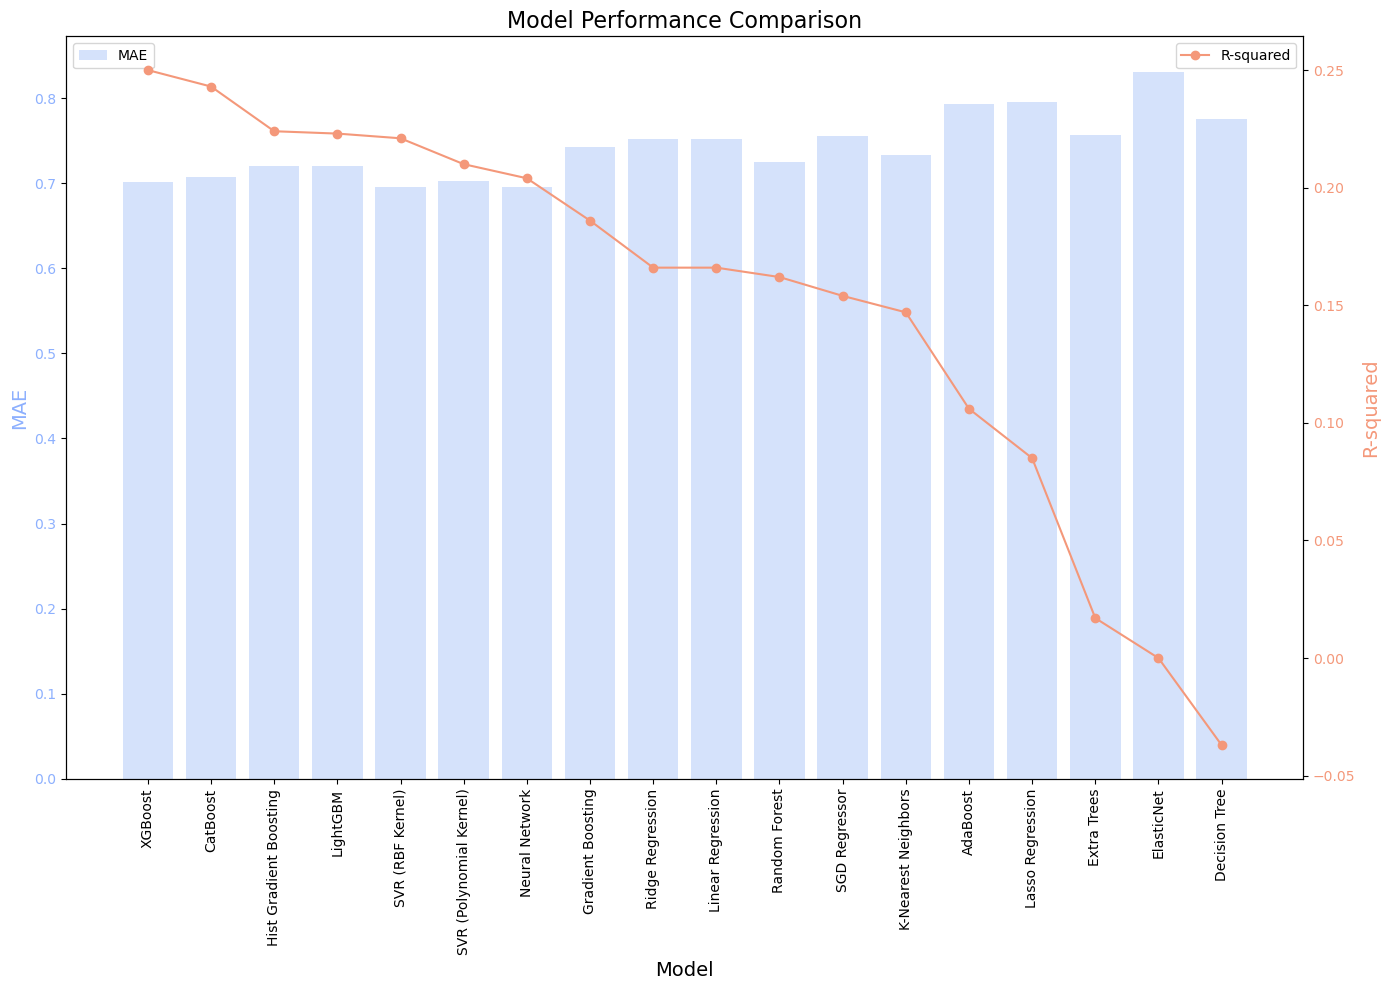

In [45]:
# given model performance results
model_performance = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'K-Nearest Neighbors', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'Gradient Boosting', 'Hist Gradient Boosting', 
              'AdaBoost', 'XGBoost', 'LightGBM', 'CatBoost', 'SVR (RBF Kernel)', 'SVR (Polynomial Kernel)', 
              'SGD Regressor', 'Neural Network'],
    'MAE': [0.752, 0.752, 0.795, 0.831, 0.733, 0.775, 0.725, 0.757, 0.742, 0.720, 0.793, 0.701, 0.720, 0.707, 0.696, 0.702, 0.756, 0.695],
    'R-squared': [0.166, 0.166, 0.085, -0.000, 0.147, -0.037, 0.162, 0.017, 0.186, 0.224, 0.106, 0.250, 0.223, 0.243, 0.221, 0.210, 0.154, 0.204]
}

# converting to DataFrame
df = pd.DataFrame(model_performance)

# sorting the models by R-squared in descending order
df_sorted = df.sort_values(by='R-squared', ascending=False)

# setting the grid and palette
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette


# plotting
fig, ax1 = plt.subplots(figsize=(14, 10))

# Bar plot for MAE
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('MAE', fontsize=14, color=palette[1])
ax1.bar(df_sorted['Model'], df_sorted['MAE'], color=palette[2], alpha=0.6, label='MAE')
ax1.tick_params(axis='y', labelcolor=palette[1])
ax1.tick_params(axis='x', rotation=90)
ax1.legend(loc='upper left')

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# line plot for R-squared
ax2.set_ylabel('R-squared', fontsize=14, color=palette[5])
ax2.plot(df_sorted['Model'], df_sorted['R-squared'], color=palette[5], label='R-squared', marker='o')
ax2.tick_params(axis='y', labelcolor=palette[5])
ax2.legend(loc='upper right')

# title
plt.title('Model Performance Comparison', fontsize=16)

# showing plot
plt.tight_layout()
plt.show()

In [47]:
# setting random seeds
python_random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# setting the neural network model
model = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# compiling the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# fitting the model on the training data
model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=10)

# predicting on the validation set
y_val_pred = model.predict(X_val_scaled)

# calculating the performance metrics for the validation set
nn_mae = mean_absolute_error(y_val, y_val_pred)
nn_mse = mean_squared_error(y_val, y_val_pred)
nn_r2 = r2_score(y_val, y_val_pred)

# printing the performance metrics for the validation set
print(f'Neural Network: \nMAE: {nn_mae:.3f}, MSE: {nn_mse:.3f}, R-Squared: {nn_r2:.3f} \n')

Epoch 1/50


/Users/kuartina/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3329/3329 ━━━━━━━━━━━━━━━━━━━━ 1s 258us/step - loss: 0.8993 - val_loss: 0.8029
Epoch 2/50
3329/3329 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step - loss: 0.7796 - val_loss: 0.7899
Epoch 3/50
3329/3329 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step - loss: 0.7596 - val_loss: 0.7804
Epoch 4/50
3329/3329 ━━━━━━━━━━━━━━━━━━━━ 1s 243us/step - loss: 0.7466 - val_loss: 0.7726
Epoch 5/50
3329/3329 ━━━━━━━━━━━━━━━━━━━━ 1s 249us/step - loss: 0.7359 - val_loss: 0.7678
Epoch 6/50
3329/3329 ━━━━━━━━━━━━━━━━━━━━ 1s 251us/step - loss: 0.7254 - val_loss: 0.7641
Epoch 7/50
3329/3329 ━━━━━━━━━━━━━━━━━━━━ 1s 248us/step - loss: 0.7176 - val_loss: 0.7613
Epoch 8/50
3329/3329 ━━━━━━━━━━━━━━━━━━━━ 1s 250us/step - loss: 0.7106 - val_loss: 0.7627
Epoch 9/50
3329/3329 ━━━━━━━━━━━━━━━━━━━━ 1s 267us/step - loss: 0.7031 - val_loss: 0.7607
Epoch 10/50
3329/3329 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - loss: 0.6986 - val_loss: 0.7606
Epoch 11/50
3329/3329 ━━━━━━━━━━━━━━━━━━━━ 1s 250us/step - loss: 0.6930 - val_loss: 0.7610
Epoch 12/50
3329/33

In [49]:
#  the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# initializing the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# initializing the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, 
                               scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# fitting the grid search to the data
grid_search_xgb.fit(X_train_scaled, y_train)

# printing the best parameters and the corresponding score
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost (MSE):", -grid_search_xgb.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best score for XGBoost (MSE): 0.7454719162488811


In [51]:
# # EVALUATION ON TEST SET
X_test_scaled = scaler.transform(X_test)
# training the final model using the best parameters
final_xgb_model = XGBRegressor(
    colsample_bytree=0.9,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=300,
    subsample=0.9,
    random_state=42
)

final_xgb_model.fit(X_train_scaled, y_train)

# redicting and evaluating on the test set
y_test_pred_xgb = final_xgb_model.predict(X_test_scaled)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

# printing the evaluation metrics for the test set
print(f'XGBoost Test MAE: {test_mae_xgb:.4f}')
print(f'XGBoost Test MSE: {test_mse_xgb:.4f}')
print(f'XGBoost Test R-squared: {test_r2_xgb:.4f}')

XGBoost Test MAE: 0.7004
XGBoost Test MSE: 0.7224
XGBoost Test R-squared: 0.2537


In [53]:
# setting up the XGBoost model with the best parameters found
xgb_model = xgb.XGBRegressor(colsample_bytree=0.9,
                             learning_rate=0.1,
                             max_depth=5,
                             n_estimators=300,
                             subsample=0.9)

# setting up the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# performing cross-validation
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

# calculating the mean and standard deviation of the cross-validation scores
cv_mse_mean = -cv_scores.mean()
cv_mse_std = cv_scores.std()

print(f'Cross-Validation MSE Mean: {cv_mse_mean:.3f}')
print(f'Cross-Validation MSE Standard Deviation: {cv_mse_std:.3f}')

Cross-Validation MSE Mean: 0.739
Cross-Validation MSE Standard Deviation: 0.013


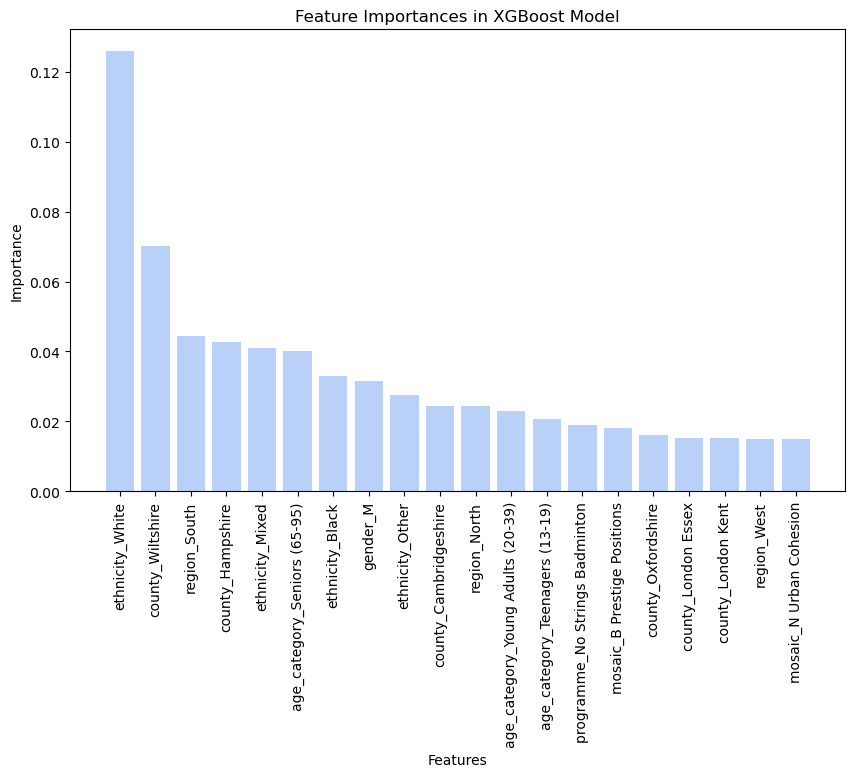

In [55]:
# getting feature importances
importances = final_xgb_model.feature_importances_
feature_names = X.columns
# setting the grid and palette
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

# creating a DataFrame 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# sorting the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color =palette[2])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in XGBoost Model')
plt.xticks(rotation=90)
plt.show()

### Classification <a class="anchor" id="class"></a>

In [135]:
be_df = pd.read_csv ("/Users/kuartina/Badminton England/be_data.csv")

In [136]:
be_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565247 entries, 0 to 565246
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   member_id             565247 non-null  object 
 1   year                  565247 non-null  int64  
 2   month                 565247 non-null  int64  
 3   county                565247 non-null  object 
 4   age                   565247 non-null  int64  
 5   gender                565247 non-null  object 
 6   mosaic                565247 non-null  object 
 7   deprivation           565247 non-null  float64
 8   ethnicity             565247 non-null  object 
 9   disability            565247 non-null  object 
 10  programme             565247 non-null  object 
 11  number_of_visits      565247 non-null  int64  
 12  age_category          565247 non-null  object 
 13  season                565247 non-null  object 
 14  region                565247 non-null  object 
 15  

In [139]:
# dropping rows where any column contains 'Unknown' or 'U'
#df = df[~df.isin(['Unknown', 'U']).any(axis=1)]
be_df = be_df[~be_df.isin(['Unknown', 'U']).any(axis=1)]

In [141]:
# applying log transformation to the target variable
be_df['log_visits'] = np.log1p(be_df['number_of_visits'])  # Using log1p to handle zero values

# calculating percentiles on the transformed data
percentiles = be_df['log_visits'].quantile([0.33, 0.66])
low_threshold = percentiles[0.33]
high_threshold = percentiles[0.66]

# defining the categories based on the transformed data
def categorize_visits(log_visits):
    if log_visits <= low_threshold:
        return 'Low'
    elif log_visits <= high_threshold:
        return 'Medium'
    else:
        return 'High'

be_df['visit_category'] = be_df['log_visits'].apply(categorize_visits)

# checking the distribution of categories
print(be_df['visit_category'].value_counts())

# dropping the log_visits column as it's no longer needed
be_df = be_df.drop(['log_visits'], axis=1)


visit_category
Medium    17016
Low       16628
High      13909
Name: count, dtype: int64


In [143]:
# dropping the original target variable and other irrelevant columns
X = be_df.drop(['number_of_visits', 'visit_category', 'member_id', 'date', 'month', 'year'], axis=1)
y = be_df['visit_category']

# one-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

In [145]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [147]:
# Initializing a variety of classification models including advanced ones
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=100, random_state=42),
    'CatBoost': CatBoostClassifier(n_estimators=100, silent=True, random_state=42),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=42),
    'SVM (Polynomial Kernel)': SVC(kernel='poly', degree=3, probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Example code to train and evaluate each model
results = []
for name, model in classification_models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_val_scaled)
    
    # Evaluating the model
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions, average='weighted')
    recall = recall_score(y_val, predictions, average='weighted')
    f1 = f1_score(y_val, predictions, average='weighted')
    
    results.append(f'{name}:\n Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}\n')

# Printing all results
for result in results:
    print(result)

/Users/kuartina/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 256
[LightGBM] [Info] Number of data points in the train set: 38042, number of used features: 55
[LightGBM] [Info] Start training from score -1.233008
[LightGBM] [Info] Start training from score -1.048449
[LightGBM] [Info] Start training from score -1.026931
Logistic Regression:
 Accuracy: 0.477, Precision: 0.471, Recall: 0.477, F1-Score: 0.469

K-Nearest Neighbors:
 Accuracy: 0.478, Precision: 0.472, Recall: 0.478, F1-Score: 0.469

Decision Tree:
 Accuracy: 0.520, Precision: 0.512, Recall: 0.520, F1-Score: 0.514

Random Forest:
 Accuracy: 0.537, Precision: 0.534, Recall: 0.537, F1-Score: 0.535

Extra Trees:
 Accuracy: 0.527, Precision: 0.519, Recall: 0.527, F1-Score: 0.521

Gradient Boosting:
 Accuracy: 0.485, Precision: 0.481, Recall

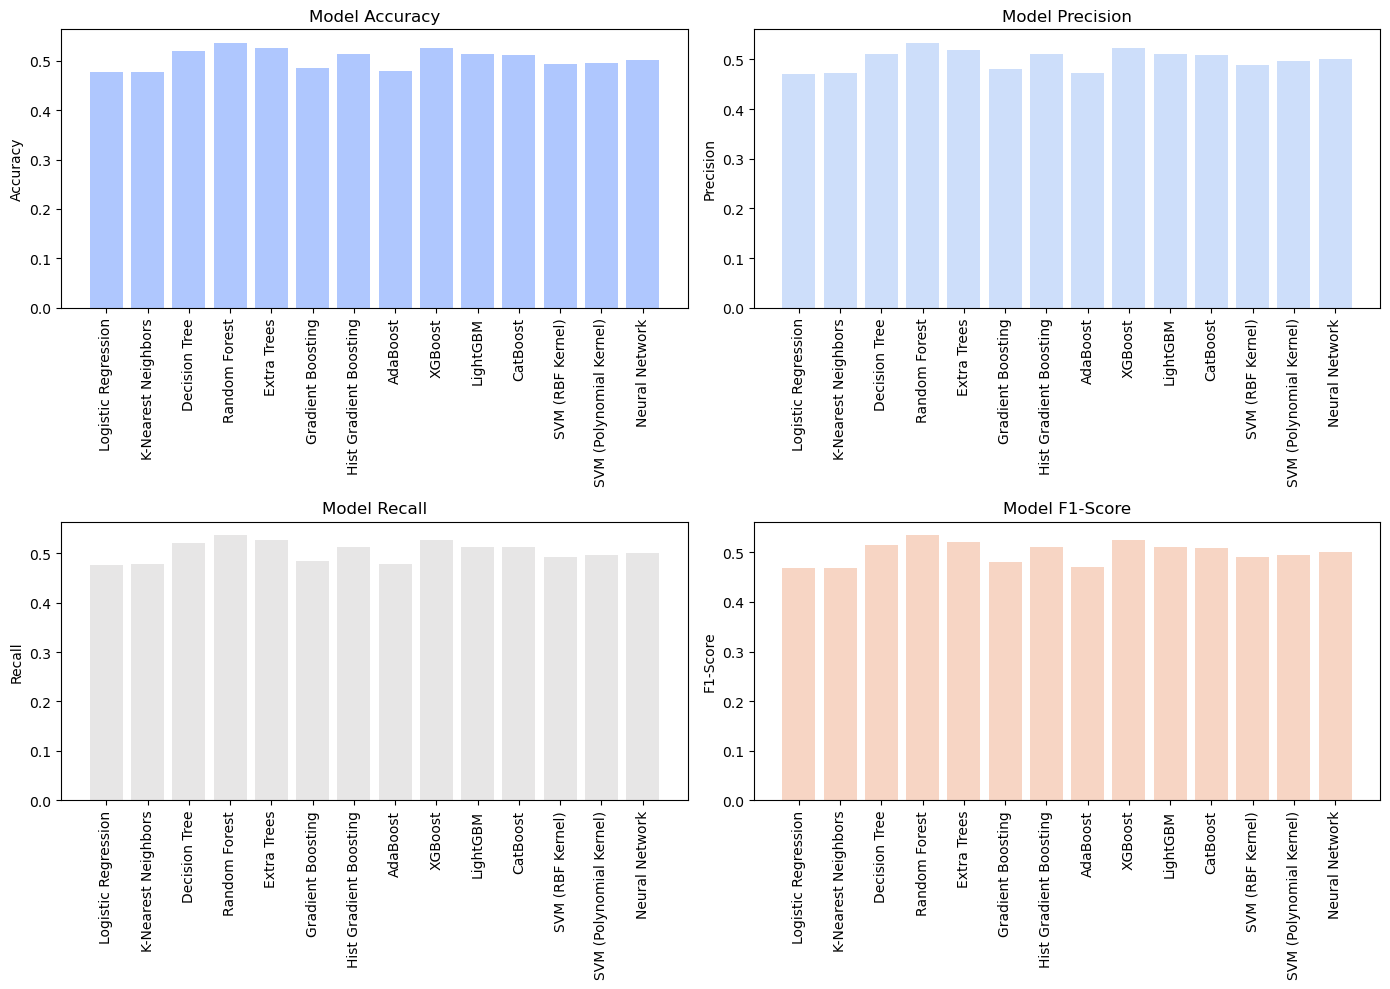

In [153]:

# Creating the DataFrame from the provided results
data = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 
              'Extra Trees', 'Gradient Boosting', 'Hist Gradient Boosting', 'AdaBoost', 
              'XGBoost', 'LightGBM', 'CatBoost', 'SVM (RBF Kernel)', 
              'SVM (Polynomial Kernel)', 'Neural Network'],
    'Accuracy': [0.477, 0.478, 0.520, 0.537, 0.527, 0.485, 0.513, 0.479, 0.527, 0.513, 0.512, 0.493, 0.496, 0.501],
    'Precision': [0.471, 0.472, 0.512, 0.534, 0.519, 0.481, 0.510, 0.472, 0.523, 0.510, 0.508, 0.488, 0.496, 0.501],
    'Recall': [0.477, 0.478, 0.520, 0.537, 0.527, 0.485, 0.513, 0.479, 0.527, 0.513, 0.512, 0.493, 0.496, 0.501],
    'F1-Score': [0.469, 0.469, 0.514, 0.535, 0.521, 0.481, 0.511, 0.470, 0.525, 0.511, 0.509, 0.490, 0.495, 0.501]
}

metrics_df = pd.DataFrame(data)

# setting the grid and palette
palette = sns.color_palette("coolwarm", 7)  # Using a diverging palette

# Plotting the results
plt.figure(figsize=(14, 10))

# Plotting Accuracy
plt.subplot(2, 2, 1)
plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color=palette[1], alpha=0.7)
plt.xticks(rotation=90)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

# Plotting Precision
plt.subplot(2, 2, 2)
plt.bar(metrics_df['Model'], metrics_df['Precision'], color=palette[2], alpha=0.7)
plt.xticks(rotation=90)
plt.title('Model Precision')
plt.ylabel('Precision')

# Plotting Recall
plt.subplot(2, 2, 3)
plt.bar(metrics_df['Model'], metrics_df['Recall'], color=palette[3], alpha=0.7)
plt.xticks(rotation=90)
plt.title('Model Recall')
plt.ylabel('Recall')

# Plotting F1-Score
plt.subplot(2, 2, 4)
plt.bar(metrics_df['Model'], metrics_df['F1-Score'], color=palette[4], alpha=0.7)
plt.xticks(rotation=90)
plt.title('Model F1-Score')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.show()

In [161]:
from scipy.stats import randint
# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='f1_weighted', random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Train the Random Forest with the best parameters
best_rf = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_rf.predict(X_val_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=174; total time=   3.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=101; total time=   3.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=7, n_estimators=229; total time=   7.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=230; total time=   4.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=189; total time=   3.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=180; total time=   4.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=289; total time=   5.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=188; total time=

/Users/kuartina/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=174; total time=   3.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=101; total time=   3.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=7, n_estimators=229; total time=   7.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=207; total time=   4.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=159; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=271; total time=   3.8s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=153; total time=   2.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=289; total time=   5.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=

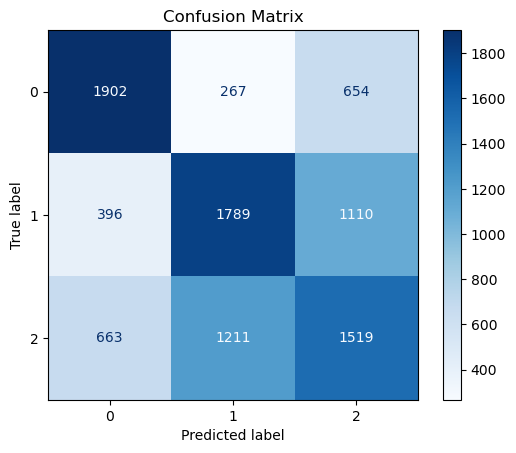

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_val_scaled, y_val, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [165]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize the Random Forest classifier with best parameters
best_rf = RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=293, random_state=42)

# Train the Random Forest with the resampled data
best_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred = best_rf.predict(X_val_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.72      0.66      2823
           1       0.56      0.54      0.54      3295
           2       0.47      0.41      0.44      3393

    accuracy                           0.55      9511
   macro avg       0.54      0.56      0.55      9511
weighted avg       0.54      0.55      0.54      9511

Confusion Matrix:
 [[2035  234  554]
 [ 501 1763 1031]
 [ 806 1179 1408]]


In [167]:
# Initialize the Random Forest classifier with class weights
best_rf_weighted = RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=293, class_weight='balanced', random_state=42)

# Train the Random Forest with class weights
best_rf_weighted.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_weighted = best_rf_weighted.predict(X_val_scaled)

# Evaluate the model
print("Classification Report with Class Weights:\n", classification_report(y_val, y_pred_weighted))
print("Confusion Matrix with Class Weights:\n", confusion_matrix(y_val, y_pred_weighted))


Classification Report with Class Weights:
               precision    recall  f1-score   support

           0       0.61      0.73      0.67      2823
           1       0.56      0.54      0.55      3295
           2       0.47      0.41      0.44      3393

    accuracy                           0.55      9511
   macro avg       0.55      0.56      0.55      9511
weighted avg       0.54      0.55      0.54      9511

Confusion Matrix with Class Weights:
 [[2054  239  530]
 [ 479 1789 1027]
 [ 819 1190 1384]]


In [177]:
from imblearn.pipeline import Pipeline
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Initialize the Random Forest classifier with class weights
rf = RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=293, class_weight='balanced', random_state=42)

# Create a pipeline with imblearn's Pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('rf', rf)
])

# Train the pipeline
pipeline.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_pipeline = pipeline.predict(X_val_scaled)

# Evaluate the model
print("Classification Report with SMOTE and Class Weights:\n", classification_report(y_val, y_pred_pipeline))
print("Confusion Matrix with SMOTE and Class Weights:\n", confusion_matrix(y_val, y_pred_pipeline))

Classification Report with SMOTE and Class Weights:
               precision    recall  f1-score   support

           0       0.61      0.72      0.66      2823
           1       0.56      0.54      0.54      3295
           2       0.47      0.41      0.44      3393

    accuracy                           0.55      9511
   macro avg       0.54      0.56      0.55      9511
weighted avg       0.54      0.55      0.54      9511

Confusion Matrix with SMOTE and Class Weights:
 [[2035  234  554]
 [ 501 1763 1031]
 [ 806 1179 1408]]


In [183]:
from sklearn.svm import SVC

# Split data into training and holdout sets
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Further split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
X_val_scaled = scaler.transform(X_val)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=293, class_weight='balanced', random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Train base models on training set
for name, model in base_models:
    model.fit(X_train_scaled, y_train)

# Create predictions on holdout set
holdout_predictions = np.column_stack([
    model.predict(X_holdout_scaled) for _, model in base_models
])

# Train meta-model on holdout predictions
meta_model = LogisticRegression()
meta_model.fit(holdout_predictions, y_holdout)

# Make final predictions on validation set
val_predictions = np.column_stack([
    model.predict(X_val_scaled) for _, model in base_models
])
y_pred_blending = meta_model.predict(val_predictions)

# Evaluate the model
print("Classification Report for Blending Ensemble:\n", classification_report(y_val, y_pred_blending))
print("Confusion Matrix for Blending Ensemble:\n", confusion_matrix(y_val, y_pred_blending))

Classification Report for Blending Ensemble:
               precision    recall  f1-score   support

           0       0.61      0.72      0.66      2256
           1       0.40      0.26      0.31      2649
           2       0.41      0.49      0.44      2704

    accuracy                           0.48      7609
   macro avg       0.47      0.49      0.47      7609
weighted avg       0.47      0.48      0.46      7609

Confusion Matrix for Blending Ensemble:
 [[1633  270  353]
 [ 390  685 1574]
 [ 634  747 1323]]


## Conclusion <a class="anchor" id="conclusion"></a>

### Comparison of Regression and Classification Results:

#### Regression Models: 
The best regression model (XGBoost) had a relatively low MAE and high R-squared value, indicating better prediction accuracy and explanatory power. However, the overall accuracy of regression models was still suboptimal, highlighting the challenges of predicting continuous visit frequencies based on demographic data alone.

#### Classification Models: 
Classification models, particularly ensemble methods like Random Forest and XGBoost, showed better performance in terms of accuracy, precision, recall, and F1-Score compared to regression models. Despite this improvement, the overall accuracy was still not good enough, indicating that demographic data alone is insufficient to accurately predict visit frequency.

The analysis revealed that demographic data alone is insufficient to accurately predict the frequency of visits to badminton facilities. While classification models showed better performance compared to regression models, the accuracy remained suboptimal, suggesting that other factors beyond demographic data play a significant role in predicting visit frequency.